In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import warnings 
warnings.filterwarnings("ignore")

In [2]:
cd = pd.read_excel('KPMG_datasets.xlsx', sheet_name='CustomerDemographic')
ca = pd.read_excel('KPMG_datasets.xlsx', sheet_name='CustomerAddress')
cn = pd.read_excel('KPMG_datasets.xlsx', sheet_name='NewCustomerList')
tr = pd.read_excel('KPMG_datasets.xlsx', sheet_name='Transactions')

In [3]:
print(tr['customer_id'].nunique())
print(cd['customer_id'].nunique())
print(ca['customer_id'].nunique())

3494
4000
3999


In [4]:
tr

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [5]:
tr.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [6]:
tr.dropna(subset=['brand'], inplace=True)

In [7]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [8]:
tr.drop('product_first_sold_date',axis=1, inplace=True)

In [9]:
num_transactions = tr.groupby('customer_id').size().reset_index(name='num_transactions')
tr = tr.merge(num_transactions, on='customer_id')

In [10]:
tr['online_order'].fillna(2, inplace=True)
tr['online_order'] = tr['online_order'].astype(int)

In [11]:
print(tr['order_status'].unique())
print(tr['product_line'].unique())
print(tr['product_class'].unique())
print(tr['product_size'].unique())

['Approved' 'Cancelled']
['Standard' 'Road' 'Touring' 'Mountain']
['medium' 'high' 'low']
['medium' 'large' 'small']


In [12]:
encoder = OrdinalEncoder()

tr['order_status'] = encoder.fit_transform(tr[['order_status']])
tr['order_status'] = tr['order_status'].astype(int)

tr['product_line'] = encoder.fit_transform(tr[['product_line']])
tr['product_line'] = tr['product_line'].astype(int)

tr['product_class'] = encoder.fit_transform(tr[['product_class']])
tr['product_class'] = tr['product_class'].astype(int)

tr['product_size'] = encoder.fit_transform(tr[['product_size']])
tr['product_size'] = tr['product_size'].astype(int)

In [13]:
tr.describe(include='all')

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,num_transactions
count,19803.000000,19803.000000,19803.000000,19803,19803.000000,19803.000000,19803,19803.000000,19803.000000,19803.000000,19803.000000,19803.000000,19803.000000
unique,NaN,NaN,NaN,364,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2017-08-18 00:00:00,NaN,NaN,Solex,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,82,NaN,NaN,4253,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9993.979650,45.815937,1739.294955,NaN,0.527950,0.008989,NaN,1.819118,1.546028,0.942483,1107.997866,556.046951,6.609857
std,5776.499961,30.569841,1011.946353,NaN,0.534218,0.094383,NaN,0.561719,0.743106,0.583736,582.770460,405.955660,2.320604
min,1.000000,0.000000,1.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,12.010000,7.210000,1.000000
25%,4988.500000,18.000000,858.000000,NaN,0.000000,0.000000,NaN,2.000000,1.000000,1.000000,575.270000,215.140000,5.000000


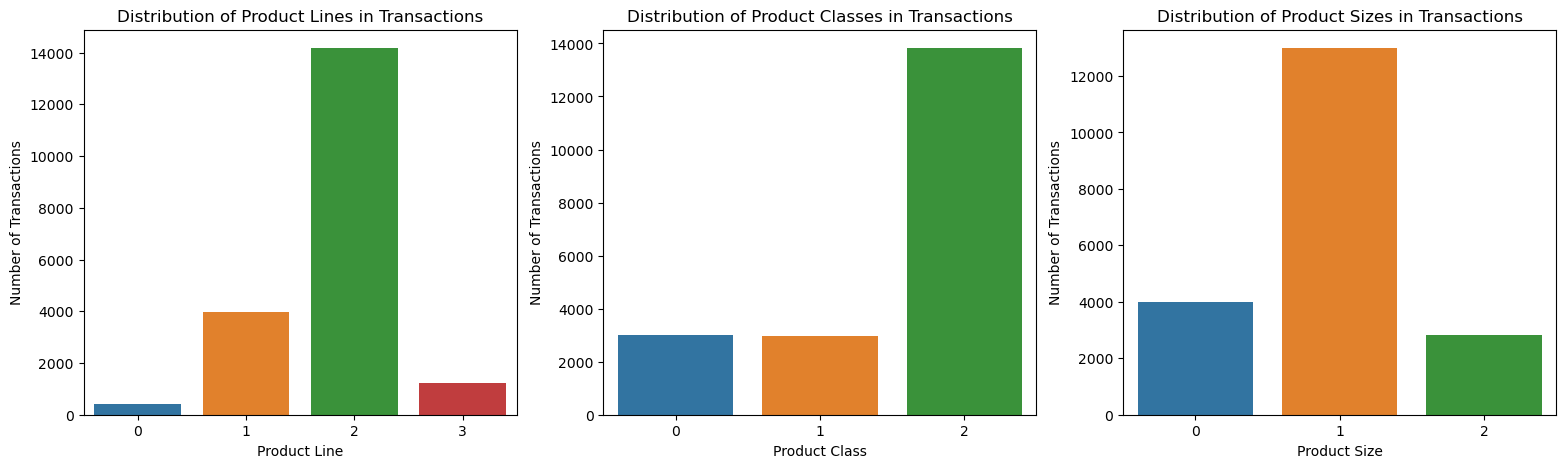

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(19,5))

sns.countplot(ax=axes[0], x='product_line', data=tr)
axes[0].set_xlabel('Product Line')
axes[0].set_ylabel('Number of Transactions')
axes[0].set_title('Distribution of Product Lines in Transactions')

sns.countplot(ax=axes[1], x='product_class', data=tr)
axes[1].set_xlabel('Product Class')
axes[1].set_ylabel('Number of Transactions')
axes[1].set_title('Distribution of Product Classes in Transactions')

sns.countplot(ax=axes[2], x='product_size', data=tr)
axes[2].set_xlabel('Product Size')
axes[2].set_ylabel('Number of Transactions')
axes[2].set_title('Distribution of Product Sizes in Transactions')

plt.show()

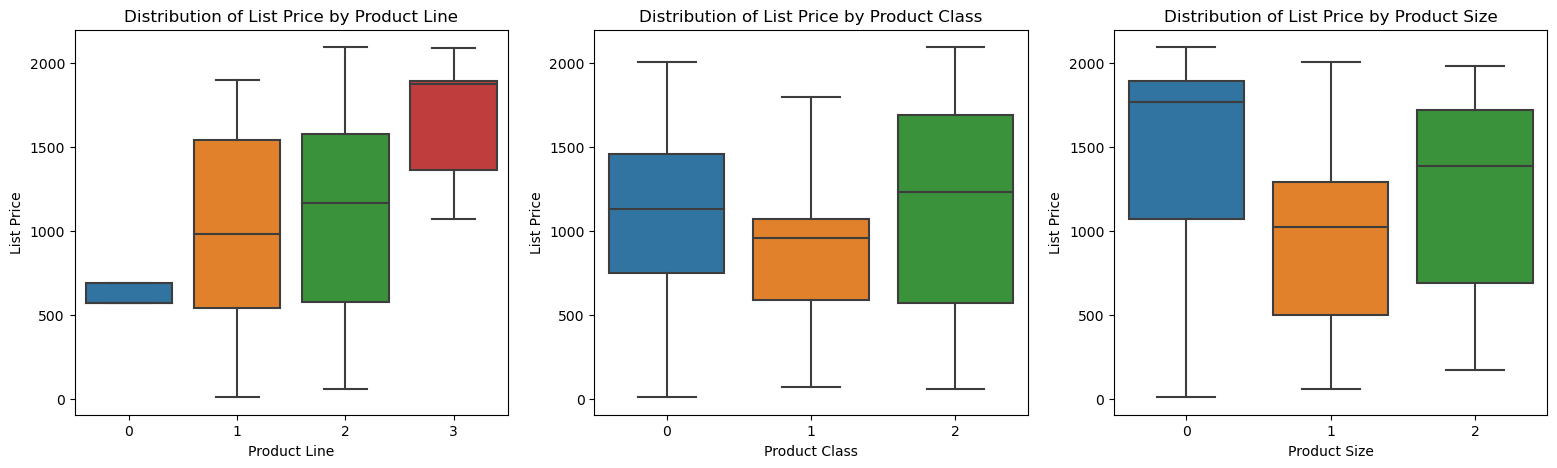

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(19,5))

sns.boxplot(ax=axes[0], x='product_line', y="list_price", data=tr)
axes[0].set_xlabel('Product Line')
axes[0].set_ylabel('List Price')
axes[0].set_title('Distribution of List Price by Product Line')

sns.boxplot(ax=axes[1], x='product_class', y="list_price", data=tr)
axes[1].set_xlabel('Product Class')
axes[1].set_ylabel('List Price')
axes[1].set_title('Distribution of List Price by Product Class')

sns.boxplot(ax=axes[2], x='product_size', y="list_price", data=tr)
axes[2].set_xlabel('Product Size')
axes[2].set_ylabel('List Price')
axes[2].set_title('Distribution of List Price by Product Size')

plt.show()

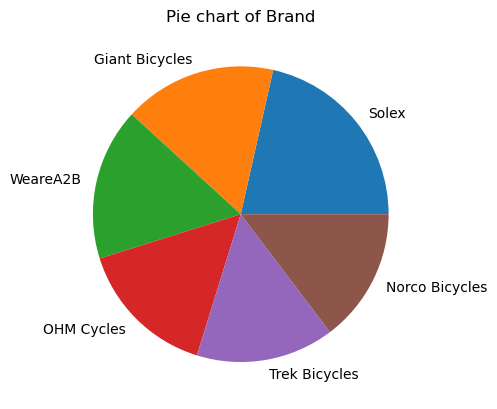

In [16]:
counts = tr['brand'].value_counts()
plt.pie(counts, labels=counts.index)
plt.title('Pie chart of Brand')
plt.show()


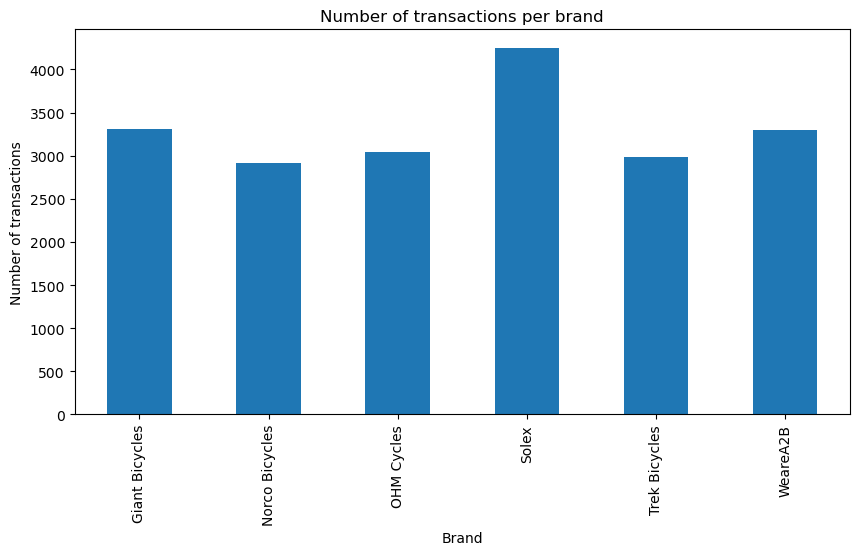

In [17]:
tr.groupby(['brand']).count()['num_transactions'].plot(kind='bar', figsize=(10, 5))
plt.title('Number of transactions per brand')
plt.xlabel('Brand')
plt.ylabel('Number of transactions')
plt.show()

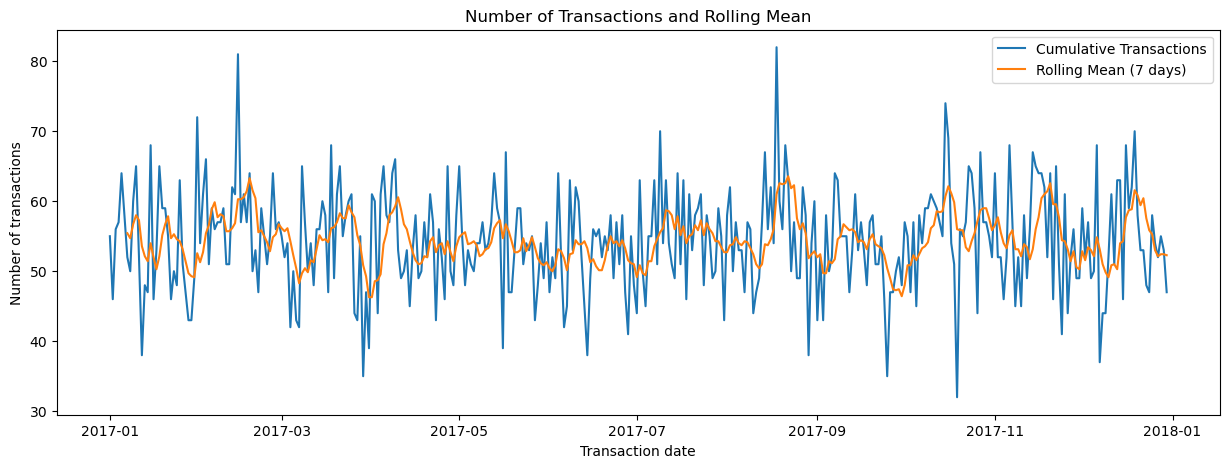

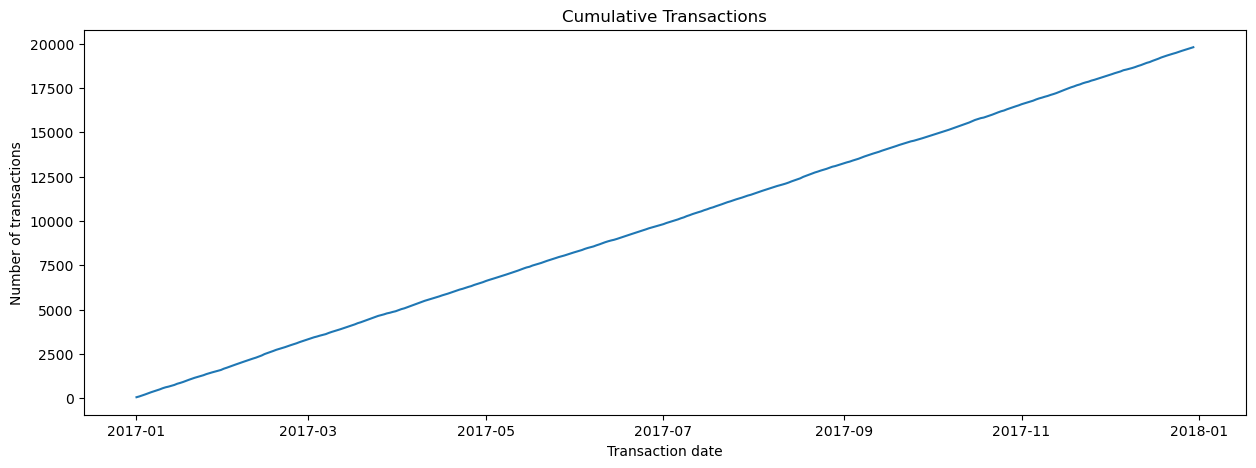

In [18]:
nums_transactions = tr.groupby(['transaction_date']).count()['num_transactions']
rolling_mean = nums_transactions.rolling(window=7).mean()

plt.figure(figsize=(15, 5))
plt.plot(nums_transactions.index, nums_transactions.values, label='Cumulative Transactions')
plt.plot(rolling_mean.index, rolling_mean.values, label='Rolling Mean (7 days)')
plt.title('Number of Transactions and Rolling Mean')
plt.xlabel('Transaction date')
plt.ylabel('Number of transactions')
plt.legend()
plt.show()

cumulative_transactions = tr.groupby(['transaction_date']).count()['num_transactions'].cumsum()

plt.figure(figsize=(15, 5))
plt.plot(cumulative_transactions.index, cumulative_transactions.values, label='Cumulative Transactions')
plt.title('Cumulative Transactions')
plt.xlabel('Transaction date')
plt.ylabel('Number of transactions')
plt.show()

<AxesSubplot: >

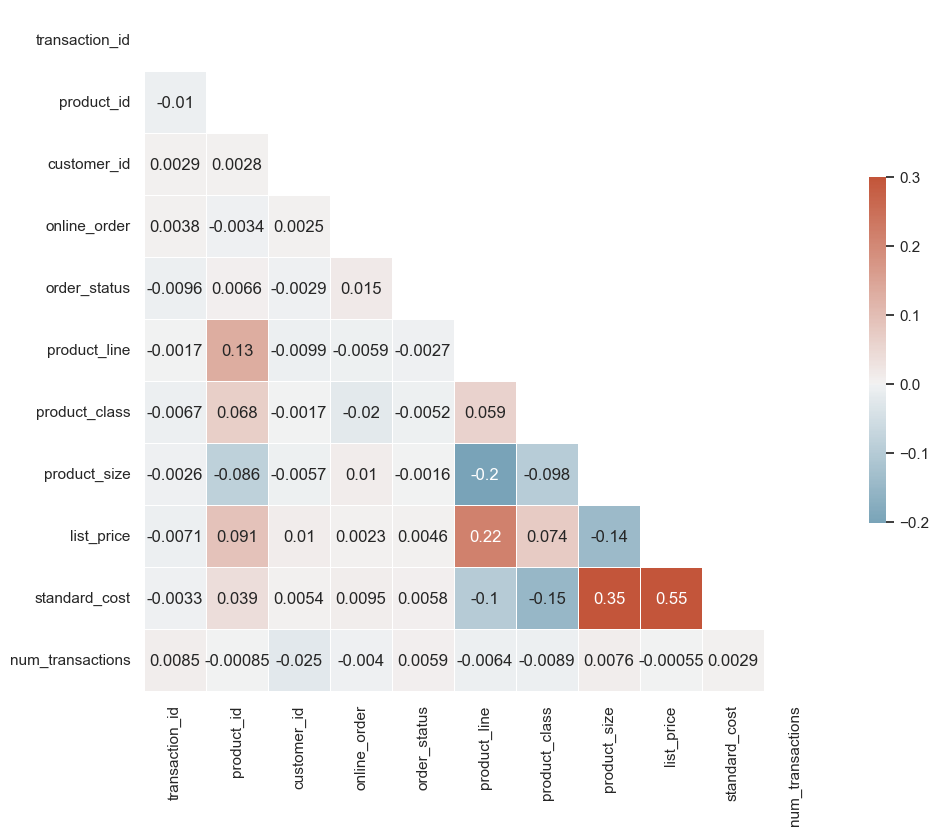

In [19]:
corr_matrix = tr.corr()

sns.set_theme(style="white")


mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [20]:
tr.to_excel('CustomersTransactions.xlsx', index=False)